In [1]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import csv, sqlite3
from sqlalchemy import create_engine
import plotly.express as px


In [2]:
df = pd.read_csv('Data/OWID_Covid_data.csv')

In [3]:
smaller_df = df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'reproduction_rate', 'new_tests', 'total_tests', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy']]

## Describing df without scientific notation

In [4]:
smaller_df['total_tests']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
157007    1816276.0
157008          NaN
157009          NaN
157010          NaN
157011          NaN
Name: total_tests, Length: 157012, dtype: float64

In [5]:
smaller_df['extreme_poverty'].describe()

count    86251.000000
mean        13.555686
std         20.010530
min          0.100000
25%          0.600000
50%          2.200000
75%         21.200000
max         77.600000
Name: extreme_poverty, dtype: float64

In [6]:
smaller_df['stringency_index'].sum()

6774006.860000001

In [7]:
# smaller_df['total_deaths'] = np.nan_to_num(smaller_df['total_deaths'])
smaller_df['total_cases'] = np.nan_to_num(smaller_df['total_cases'])
smaller_df['new_cases'] = np.nan_to_num(smaller_df['new_cases'])

# smaller_df['reproduction_rate'] = np.nan_to_num(smaller_df['reproduction_rate'])
# smaller_df['population'] = np.nan_to_num(smaller_df['population'])
# smaller_df['gdp_per_capita'] = np.nan_to_num(smaller_df['gdp_per_capita'])
# smaller_df['extreme_poverty'] = np.nan_to_num(smaller_df['extreme_poverty'])
# smaller_df['life_expectancy'] = np.nan_to_num(smaller_df['life_expectancy'])
# smaller_df['hospital_beds_per_thousand'] = np.nan_to_num(smaller_df['hospital_beds_per_thousand'])
# smaller_df['stringency_index'] = np.nan_to_num(smaller_df['stringency_index'])


# smaller_df = smaller_df[smaller_df['total_tests'] != 0]
smaller_df = smaller_df[smaller_df['new_cases'] >= 0]
smaller_df = smaller_df[smaller_df['total_cases'] >= 0]

# smaller_df = smaller_df[smaller_df['new_deaths'] >= 0]
# smaller_df = smaller_df[smaller_df['population'] >= 50]
# smaller_df = smaller_df[smaller_df['gdp_per_capita'] >= 600]
# smaller_df = smaller_df[smaller_df['extreme_poverty'] > 0]
# smaller_df = smaller_df[smaller_df['hospital_beds_per_thousand'] > 0]
# smaller_df = smaller_df[smaller_df['stringency_index'] > 0]




<ipython-input-7-460e7d9a6059>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smaller_df['total_cases'] = np.nan_to_num(smaller_df['total_cases'])
<ipython-input-7-460e7d9a6059>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smaller_df['new_cases'] = np.nan_to_num(smaller_df['new_cases'])


In [8]:
(smaller_df['positive_rate'] == 0).sum()

777

In [9]:
for i in smaller_df['location'].unique():
    print(i)

Afghanistan
Africa
Albania
Algeria
Andorra
Angola
Anguilla
Antigua and Barbuda
Argentina
Armenia
Aruba
Asia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bonaire Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czechia
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Europe
European Union
Faeroe Islands
Falkland Islands
Fiji
Finland
France
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guatemala
Guernsey
Guinea
Guinea-Bissau
Guyana
Haiti
High income
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
International
Iran
Iraq
I

In [10]:
smaller_df['location'].value_counts()


Peru         755
Mexico       755
Argentina    755
Thailand     751
Taiwan       738
            ... 
Tuvalu       179
Palau        156
Tokelau      114
Pitcairn      85
Niue          43
Name: location, Length: 238, dtype: int64

In [22]:
smaller_df['total_deaths'].min()

1.0

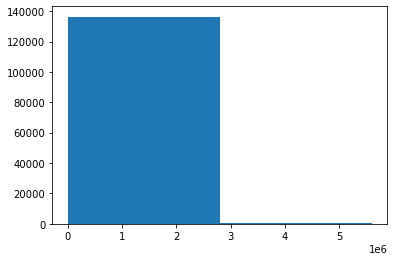

In [25]:
fig, ax = plt.subplots()
ax.hist(smaller_df['total_deaths'], bins= 2)
plt.show()
# ax.hist(smaller_df['aged_70_older'])
# plt.show()
# ax.hist(smaller_df['gdp_per_capita'])
# plt.show()

In [12]:
smaller_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,...,population_density,median_age,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,156915.00000,156915.00000,136640.00000,136801.00000,118228.00000,63840.00000,64621.00000,74435.00000,73718.00000,41268.00000,...,139678.00000,130184.00000,129485.00000,130784.00000,86202.00000,129172.00000,135938.00000,64714.00000,116820.00000,146459.00000
mean,2195396.56589,9538.65154,54259.80149,169.99912,1.01284,64652.58404,15615649.53173,0.08856,240.80383,149091309.35066,...,464.92140,30.57815,5.53724,19664.37616,13.55684,259.96262,8.20427,50.80220,3.02827,73.57899
std,13172053.58270,67869.95413,284865.40421,828.38445,0.36217,211520.40112,59011723.88186,0.09899,4366.83694,682267719.38524,...,2146.62382,9.10034,4.18699,20653.90041,20.01116,119.83152,4.48838,31.81117,2.45161,7.49649
min,0.00000,0.00000,1.00000,-1583.00000,-0.03000,1.00000,0.00000,0.00000,1.00000,0.00000,...,0.13700,15.10000,0.52600,661.24000,0.10000,79.37000,0.99000,1.18800,0.10000,53.28000
25%,1333.00000,0.00000,71.00000,0.00000,0.83000,2455.00000,341336.00000,0.01620,7.80000,510988.00000,...,36.25300,22.20000,2.06300,4466.50700,0.60000,168.71100,5.31000,19.35100,1.30000,69.50000
50%,19903.00000,66.00000,707.00000,2.00000,1.01000,9002.00000,1729775.00000,0.05190,18.90000,4111804.00000,...,85.12900,29.90000,3.91500,12951.83900,2.20000,243.81100,7.17000,49.83900,2.40000,75.05000
75%,257306.00000,927.00000,6709.25000,19.00000,1.19000,36408.00000,7719876.00000,0.12750,58.80000,25056992.75000,...,212.86500,39.10000,8.67800,27936.89600,21.20000,329.94200,10.43000,83.24100,4.00000,78.93000
max,354959680.00000,4232499.00000,5604957.00000,18061.00000,6.05000,3740296.00000,762950814.00000,0.97040,422065.60000,9928261024.00000,...,20546.76600,48.20000,18.49300,116935.60000,77.60000,724.41700,30.53000,100.00000,13.80000,86.75000


In [13]:
smaller_df.isna().sum()

location                           0
date                               0
total_cases                        0
new_cases                          0
total_deaths                   20275
new_deaths                     20114
reproduction_rate              38687
new_tests                      93075
total_tests                    92294
positive_rate                  82480
tests_per_case                 83197
tests_units                    75650
total_vaccinations            115647
people_vaccinated             117594
stringency_index               33620
population                      1035
population_density             17237
median_age                     26731
aged_70_older                  27430
gdp_per_capita                 26131
extreme_poverty                70713
cardiovasc_death_rate          27743
diabetes_prevalence            20977
handwashing_facilities         92201
hospital_beds_per_thousand     40095
life_expectancy                10456
dtype: int64

In [14]:
smaller_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,...,population_density,median_age,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,156915.00000,156915.00000,136640.00000,136801.00000,118228.00000,63840.00000,64621.00000,74435.00000,73718.00000,41268.00000,...,139678.00000,130184.00000,129485.00000,130784.00000,86202.00000,129172.00000,135938.00000,64714.00000,116820.00000,146459.00000
mean,2195396.56589,9538.65154,54259.80149,169.99912,1.01284,64652.58404,15615649.53173,0.08856,240.80383,149091309.35066,...,464.92140,30.57815,5.53724,19664.37616,13.55684,259.96262,8.20427,50.80220,3.02827,73.57899
std,13172053.58270,67869.95413,284865.40421,828.38445,0.36217,211520.40112,59011723.88186,0.09899,4366.83694,682267719.38524,...,2146.62382,9.10034,4.18699,20653.90041,20.01116,119.83152,4.48838,31.81117,2.45161,7.49649
min,0.00000,0.00000,1.00000,-1583.00000,-0.03000,1.00000,0.00000,0.00000,1.00000,0.00000,...,0.13700,15.10000,0.52600,661.24000,0.10000,79.37000,0.99000,1.18800,0.10000,53.28000
25%,1333.00000,0.00000,71.00000,0.00000,0.83000,2455.00000,341336.00000,0.01620,7.80000,510988.00000,...,36.25300,22.20000,2.06300,4466.50700,0.60000,168.71100,5.31000,19.35100,1.30000,69.50000
50%,19903.00000,66.00000,707.00000,2.00000,1.01000,9002.00000,1729775.00000,0.05190,18.90000,4111804.00000,...,85.12900,29.90000,3.91500,12951.83900,2.20000,243.81100,7.17000,49.83900,2.40000,75.05000
75%,257306.00000,927.00000,6709.25000,19.00000,1.19000,36408.00000,7719876.00000,0.12750,58.80000,25056992.75000,...,212.86500,39.10000,8.67800,27936.89600,21.20000,329.94200,10.43000,83.24100,4.00000,78.93000
max,354959680.00000,4232499.00000,5604957.00000,18061.00000,6.05000,3740296.00000,762950814.00000,0.97040,422065.60000,9928261024.00000,...,20546.76600,48.20000,18.49300,116935.60000,77.60000,724.41700,30.53000,100.00000,13.80000,86.75000


KeyError: 'iso_code'

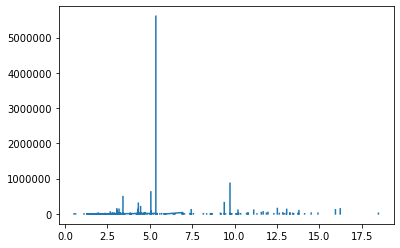

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['aged_70_older'], df['total_deaths'] )
ax.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [ ]:
# fig, ax = plt.subplots()
# ax.hist(smaller_df['gdp_per_capita'])
# plt.show()
# ax.hist(smaller_df['aged_70_older'])
# plt.show()
# ax.hist(smaller_df['gdp_per_capita'])
# plt.show()

In [ ]:
# fig, ax = plt.subplots()
# ax.plot(df['new_cases'], df['new_deaths'], 'bo')
# ax.ticklabel_format(useOffset=False, style='plain')
# plt.show()

# fig, ax = plt.subplots()
# ax.plot(df['total_cases'], df['total_deaths'], 'bo')
# ax.ticklabel_format(useOffset=False, style='plain')
# plt.show()

# fig, ax = plt.subplots()
# ax.plot(df['aged_70_older'], df['total_deaths'], 'bo')
# ax.ticklabel_format(useOffset=False, style='plain')
# plt.show()

In [ ]:
# %matplotlib qt
# import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d
# from mpl_toolkits.mplot3d import axes3d

# x = smaller_df['total_deaths']
# y = smaller_df['new_deaths']
# z = smaller_df['gdp_per_capita']


# def threeD_rotation():
#     fig = plt.figure(figsize = (15, 10))
#     ax = fig.add_subplot(projection ="3d")
#     ax.scatter3D(z, y, x, color = "green")
#     ax.set_xlabel('Total Deaths')
#     ax.set_ylabel('New Deaths')
#     ax.set_zlabel('GDP Per Captia')
#     for angle in range(0, 360):
#         ax.view_init(30, angle)
#         plt.draw()
#         plt.pause(.00001)
#         plt.show()

# threeD_rotation()

In [ ]:
# con = sqlite3.connect(':memory:')
# cur = con.cursor()
# cur.execute('CREATE TABLE t (iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million,new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients,hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, new_tests, total_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed, new_people_vaccinated_smoothed_per_hundred, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index, excess_mortality_cumulative_absolute, excess_mortality_cumulative, excess_mortality, excess_mortality_cumulative_per_million);')

# with open('Data/OWID_Covid_data.csv', 'r') as fin:
#     dr = csv.DictReader(fin)
#     to_db = [(i['iso_code'], i['continent'], i['location'], i['date'], i['total_cases'], i['new_cases'], i['new_cases_smoothed'], i['total_deaths'], i['new_deaths'], i['new_deaths_smoothed'], i['total_cases_per_million'], i['new_cases_per_million'], i['new_cases_smoothed_per_million'], i['total_deaths_per_million'], i['new_deaths_per_million'], i['new_deaths_smoothed_per_million'], i['reproduction_rate'], i['icu_patients'], i['icu_patients_per_million'], i['hosp_patients'], i['hosp_patients_per_million'], i['weekly_icu_admissions'], i['weekly_icu_admissions_per_million'], i['weekly_hosp_admissions'], i['weekly_hosp_admissions_per_million'], i['new_tests'], i['total_tests'], i['total_tests_per_thousand'], i['new_tests_per_thousand'], i['new_tests_smoothed'], i['new_tests_smoothed_per_thousand'], i['positive_rate'], i['tests_per_case'], i['tests_units'], i['total_vaccinations'], i['people_vaccinated'], i['people_fully_vaccinated'], i['total_boosters'], i['new_vaccinations'], i['new_vaccinations_smoothed'], i['total_vaccinations_per_hundred'], i['people_vaccinated_per_hundred'], i['people_fully_vaccinated_per_hundred'], i['total_boosters_per_hundred'], i['new_vaccinations_smoothed_per_million'], i['new_people_vaccinated_smoothed'], i['new_people_vaccinated_smoothed_per_hundred'], i['stringency_index'], i['population'], i['population_density'], i['median_age'], i['aged_65_older'], i['aged_70_older'], i['gdp_per_capita'], i['extreme_poverty'], i['cardiovasc_death_rate'], i['diabetes_prevalence'], i['female_smokers'], i['male_smokers'], i['handwashing_facilities'], i['hospital_beds_per_thousand'], i['life_expectancy'], i['human_development_index'], i['excess_mortality_cumulative_absolute'], i['excess_mortality_cumulative'], i['excess_mortality'], i['excess_mortality_cumulative_per_million'] ) for i in dr]

# cur.executemany('INSERT INTO t (iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million,new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients,hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, new_tests, total_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed, new_people_vaccinated_smoothed_per_hundred, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index, excess_mortality_cumulative_absolute, excess_mortality_cumulative, excess_mortality, excess_mortality_cumulative_per_million) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?);', to_db)

# con.commit()
